In [1]:
using DifferentialEquations
using Plots
using LinearAlgebra

This solves

min -x_1-2x_2

s.t. 2x_1+x_2 <= 4

     x_1+2x_2 <= 4
     
     x_1,x_2 >=0

In [127]:
s = 0.2
A = [1 2; 2 1]
c = [-3;2]
b=[4;4]
ini_solution=[1.0;1;0;0]
num_iter=300


300

In [128]:
function lyapunov(solution, A, c, b)
    primal_gradient = A*solution[3:4]+c
    dual_gradient = -A*solution[1:2]+b
    lyapunov_value = 0
    for idx in 1:2
        if solution[idx] <= 0 && primal_gradient[idx] >= 0
            continue
        end
        lyapunov_value += primal_gradient[idx]^2
    end
    for idx in 1:2
        if solution[idx+2] <= 0 && dual_gradient[idx] >= 0
            continue
        end
        lyapunov_value += dual_gradient[idx]^2
    end
    return lyapunov_value
end

lyapunov (generic function with 1 method)

In [132]:
solutions = zeros(4, num_iter)
current_solution = copy(ini_solution)
for i in 1:num_iter
    println(lyapunov(current_solution, A, c, b))
    solutions[:,i] = current_solution
    middle_solution = copy(current_solution)
    middle_solution[1:2] -= s*(A*current_solution[3:4]+c)
    middle_solution[3:4] -= s*(-A*current_solution[1:2]+b)
    middle_solution[middle_solution.<0.] .= 0
    next_solution = copy(current_solution)
    next_solution[1:2] -= s*(A*middle_solution[3:4]+c)
    next_solution[3:4] -= s*(-A*middle_solution[1:2]+b)
    next_solution[next_solution.<0.] .= 0
    current_solution = copy(next_solution)
end


13.0
13.0
12.472
6.641154559999999
5.748583387135998
4.975973779904921
4.3072029038857
3.7283148336034615
3.227229319967158
2.793489699363573
2.418044683769108
2.0930594782705407
1.81175228439098
1.568252777368832
1.3574796040904606
1.1750343453007028
1.0171097292922888
0.8804101816754053
0.7620830532582303
0.6596590909003239
0.5710009090833198
0.4942583869025222
0.4278300597028233
0.370329699678764
0.320557388041938
0.27747447508910156
0.24018190563712616
0.20790145751949637
0.17995950162887617
0.15577294460995544
0.1348370608543775
0.116714959875549
0.101028469268275
0.08745024299861873
0.07569693033960449
0.06552326290196178
0.056716936367938155
0.04909418012008732
0.04249592231194748
0.036784470353221764
0.031840637537748816
0.02756125585267541
0.02385702306607588
0.020650639165995254
0.017875193262085476
0.015472767287661183
0.013393227364199557
0.011593177606451116
0.010035054536144103
0.008686343206486338
0.007518898679534561
0.006508358697005079
0.005633635288127627
0.004876474

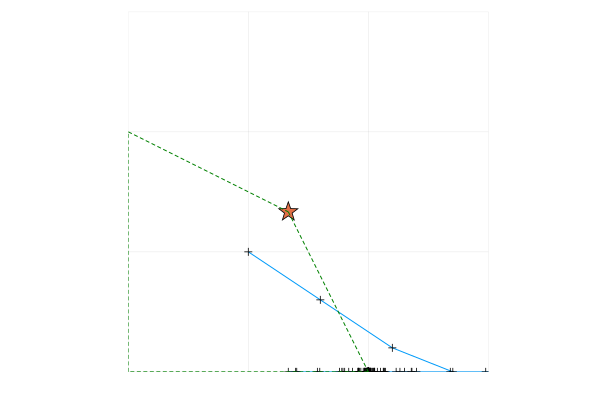

In [130]:
plot(solutions[1,:], solutions[2,:], markershape=:+, markercolor=:black, axis=false)
plot!([4/3],[4/3], markershape=:star5, label="optimal solution", markersize = 10,
      legend=false, aspect_ratio=:equal)
plot!([0,0],[0,2], linestyle=:dash, linecolor=:green)
plot!([0,4/3],[2,4/3], linestyle=:dash, linecolor=:green)
plot!([4/3,2],[4/3,0], linestyle=:dash, linecolor=:green)
plot!([2,0],[0,0], linestyle=:dash, linecolor=:green)
xlims!((0,3))
ylims!((0,3))


# savefig("mp_2d")

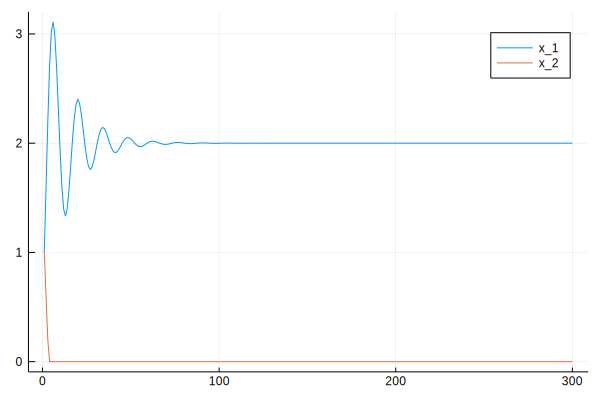

In [131]:
plot(solutions[1,:], label="x_1")
plot!(solutions[2,:], label="x_2")
# savefig("mp_1d")

In [104]:
solutions

4×300 Array{Float64,2}:
 1.0  1.4  1.8   1.992   1.96064   1.80074   …  1.64693   1.64693   1.64693 
 1.0  1.2  1.4   1.424   1.25472   0.991565     0.706146  0.706146  0.706146
 0.0  0.0  0.12  0.344   0.516672  0.529882     0.0       0.0       0.0     
 0.0  0.0  0.2   0.5408  0.8592    1.03989      1.0       1.0       1.0     

In [1]:
using DifferentialEquations
using Plots
using LinearAlgebra

In [123]:
s = 0.3
F_matrix = [0 1; -1 0]

function gd_discrete(ini_solution, num_iter, s=0.3)
#   s = 0.3
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    next_solution = copy(current_solution)
    next_solution -= s*F_matrix*current_solution
    current_solution = copy(next_solution)
  end
  return solutions
end

function new_discrete(ini_solution, num_iter, s=0.3)
#   s = 0.3
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    next_solution = copy(current_solution)
    next_solution += s*F_matrix*F_matrix*current_solution
    current_solution = copy(next_solution)
  end
  return solutions
end

function egd_discrete(ini_solution, num_iter, s=0.3)
#   s = 0.3
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    middle_solution = copy(current_solution)
    middle_solution -= s*F_matrix*current_solution
    next_solution = copy(current_solution)
    next_solution -= s*F_matrix*middle_solution
    current_solution = copy(next_solution)
  end
  return solutions
end

function pdhg_discrete(ini_solution, num_iter, s=0.3)
#   s = 0.3
  solutions = zeros(2, num_iter)
  current_solution = copy(ini_solution)
  for i in 1:num_iter
    solutions[:,i] = current_solution
    next_solution = copy(current_solution)
    next_solution[1] -= s*next_solution[2]
    next_solution[2] += s*(2*next_solution[1]-current_solution[1])
    current_solution = copy(next_solution)
  end
  return solutions
end

pdhg_discrete (generic function with 2 methods)

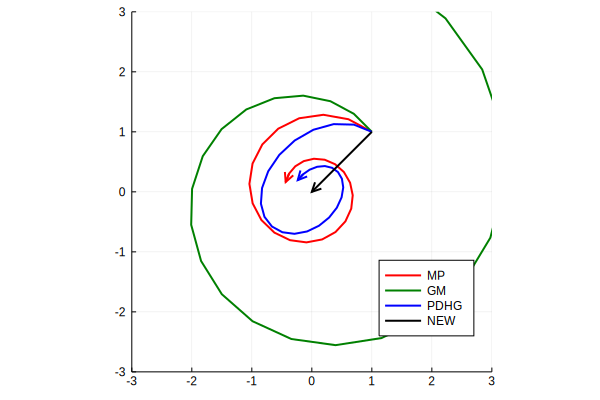

In [126]:
x0 = [1.0;1.0]
tspan = (0.0,8.0)
# solutions_pgd = pgd_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_gd = gd_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_egd = egd_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_pdhg = pdhg_discrete(x0, Int(ceil(tspan[2]/s)))
solutions_new = new_discrete(x0, Int(ceil(tspan[2]/s)))
# ODE_pgd = ODEProblem(pgd!,x0,tspan)
# sol_pgd = solve(ODE_pgd);
xylim=3

plot(solutions_egd[1,:], solutions_egd[2,:], color=:red, linewidth=2, label="MP", arrow=0.5,legend=:bottomright, aspect_ratio=:equal)
plot!(solutions_gd[1,:], solutions_gd[2,:], color=:green, linewidth=2, label="GM", arrow=0.5,legend=:bottomright, aspect_ratio=:equal)
plot!(solutions_pdhg[1,:], solutions_pdhg[2,:], color=:blue, linewidth=2, label="PDHG", arrow=0.5,legend=:bottomright, aspect_ratio=:equal)
plot!(solutions_new[1,:], solutions_new[2,:], color=:black, linewidth=2, label="NEW", arrow=0.5,legend=:bottomright, aspect_ratio=:equal)


xlims!((-xylim,xylim))
ylims!((-xylim,xylim))
# savefig("MP_GM_PDHG")